# Task 1 - Exploratory Data Analysis


---

## Section 1 - Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Access data from GDrive and create pandas dataframe.

In [ ]:
path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


`.head()` get the first 5 rows
`.tail()` get the last 5 rows


Possible usage on n-rows: `head(10)` or `tail(10)`

---

## Section 3 - Descriptive statistics

From just looking at the data, it is hard to get a feeling of what all the columns and rows mean. To gain an understanding of the dataset, let's first look at what columns and datatypes we have

In [ ]:
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


The `.info()` method creates a data description of the dataframe. It tells us:

- How many rows (7829)
- How many columns (8)
- Column names
- How many values are non-null for each column
- The types of data contained within each column
- The size of the dataset loaded into memory (~550KB)

Looking at the output of the `.info()` method, we can intepret each column as follows:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

It is also interesting to look at the datatypes. We can see that there are 3 different datatypes within this dataset:

- object = this column contains categorical values
- float64 = this column contains floating point numerical values (i.e. decimal numbers)
- int64 = this column contains integer values (whole numbers)

Now let's compute some descriptive statistics of the numeric columns:

In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The `.describe()` method computes some descriptive statistics of the numerical columns, including:

- count = count of how many unique values exist
- mean = mean average value of this column
- std = standard deviation
- min = minimum value
- 25% = lower quartile value
- 50% = median value
- 75% = upper quartile value
- max = maximum value

---

## Section 4 - Visualisation

These statistics are useful, but they are better understood using visualisations.

For visualisation, we will use the `seaborn` package.

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
# Calculate the total sales
total_sales = df['total'].sum()

# Display the total sales
print("Total Sales:", total_sales)

Total Sales: 154308.85


Code Snippets to visualise different columns within the dataset:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

0-5      3069
5-10     2433
10-15    1355
15+       972
Name: price_range, dtype: int64
0-5      39.200409
5-10     31.076766
10-15    17.307447
15+      12.415379
Name: price_range, dtype: float64


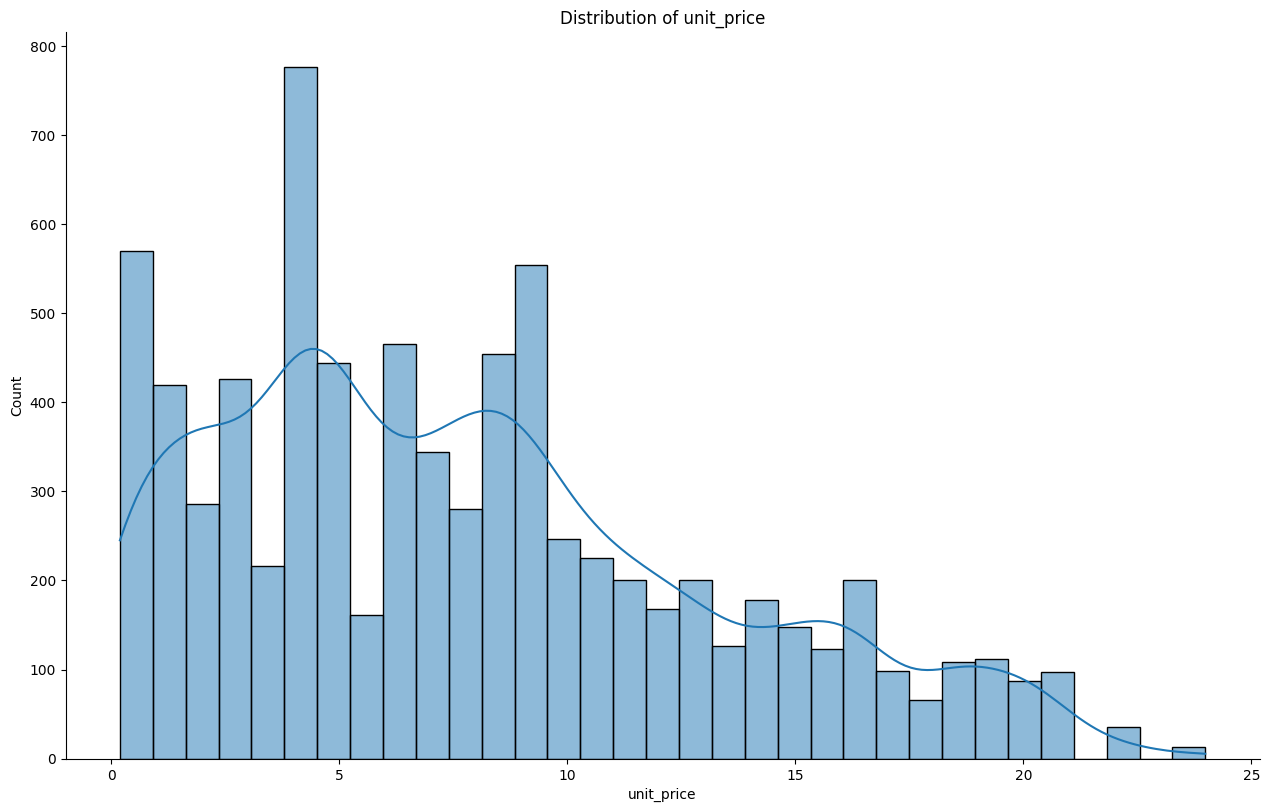

In [ ]:
bins = [0, 5, 10, 15, float('inf')]
labels = ['0-5', '5-10', '10-15', '15+']
# Use pd.cut() to categorize the unit_price values into the specified ranges
df['price_range'] = pd.cut(df['unit_price'], bins=bins, labels=labels, right=False)
# Count the number of items in each price range
sales_distribution = df['price_range'].value_counts().sort_index()
# Display the sales distribution
print(sales_distribution)


# Use pd.cut() to categorize the unit_price values into the specified ranges
df['price_range'] = pd.cut(df['unit_price'], bins=bins, labels=labels, right=False)
# Calculate the sales distribution as percentages
sales_distribution_percentages = (df['price_range'].value_counts(normalize=True) * 100).sort_index()
# Display the sales distribution as percentages
print(sales_distribution_percentages)


plot_continuous_distribution(df, 'unit_price')

This tell us that the distribution of `unit_price` is positively skewed, that is, there are more sales of products with a low unit_price compared to products with a high unit_price.

This makes sense, you would expect a grocery store to sell more products that are cheap, and just a few products that are really expensive.

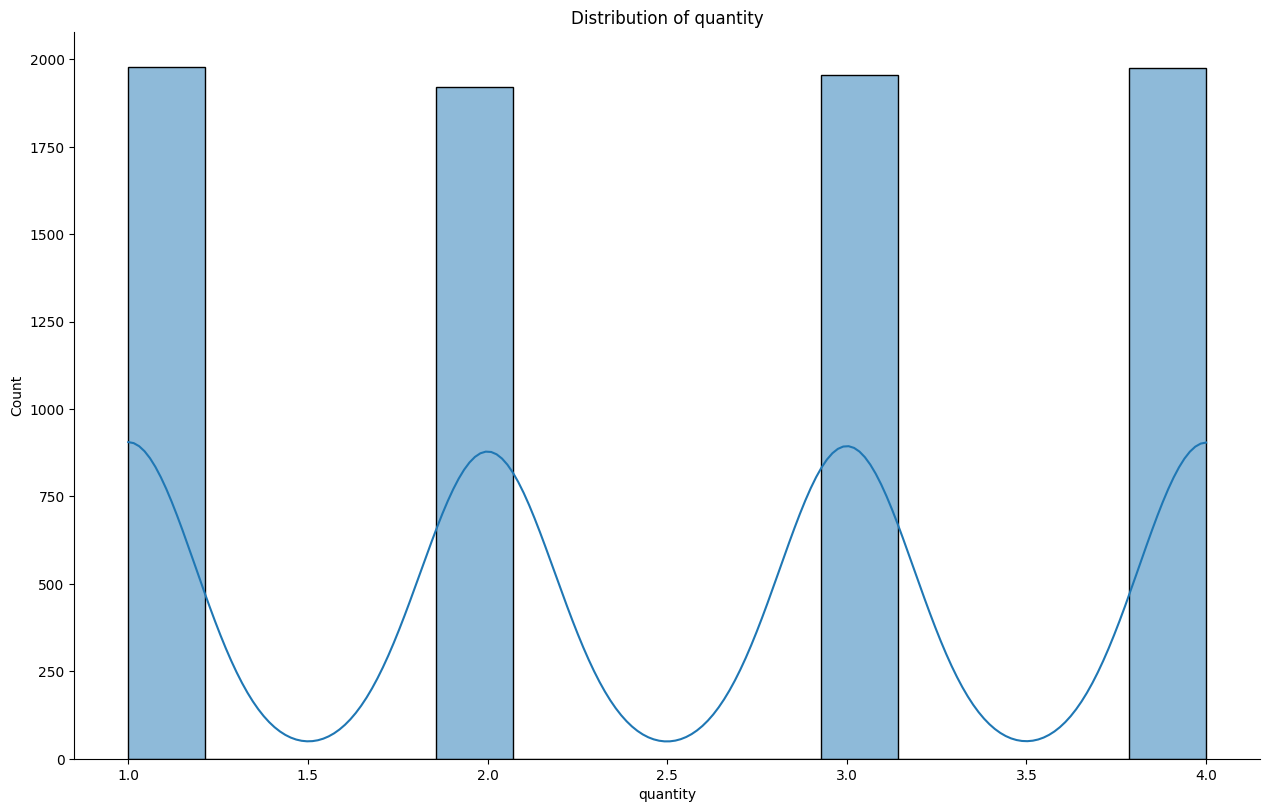

In [ ]:
plot_continuous_distribution(df, 'quantity')

The distribution of `quantity` is very different. We can see that only 4 unique values exist (1, 2, 3, and 4) and they are quite evenly distributed. It seems as though customers are buying in even quantities across 1 to 4 units

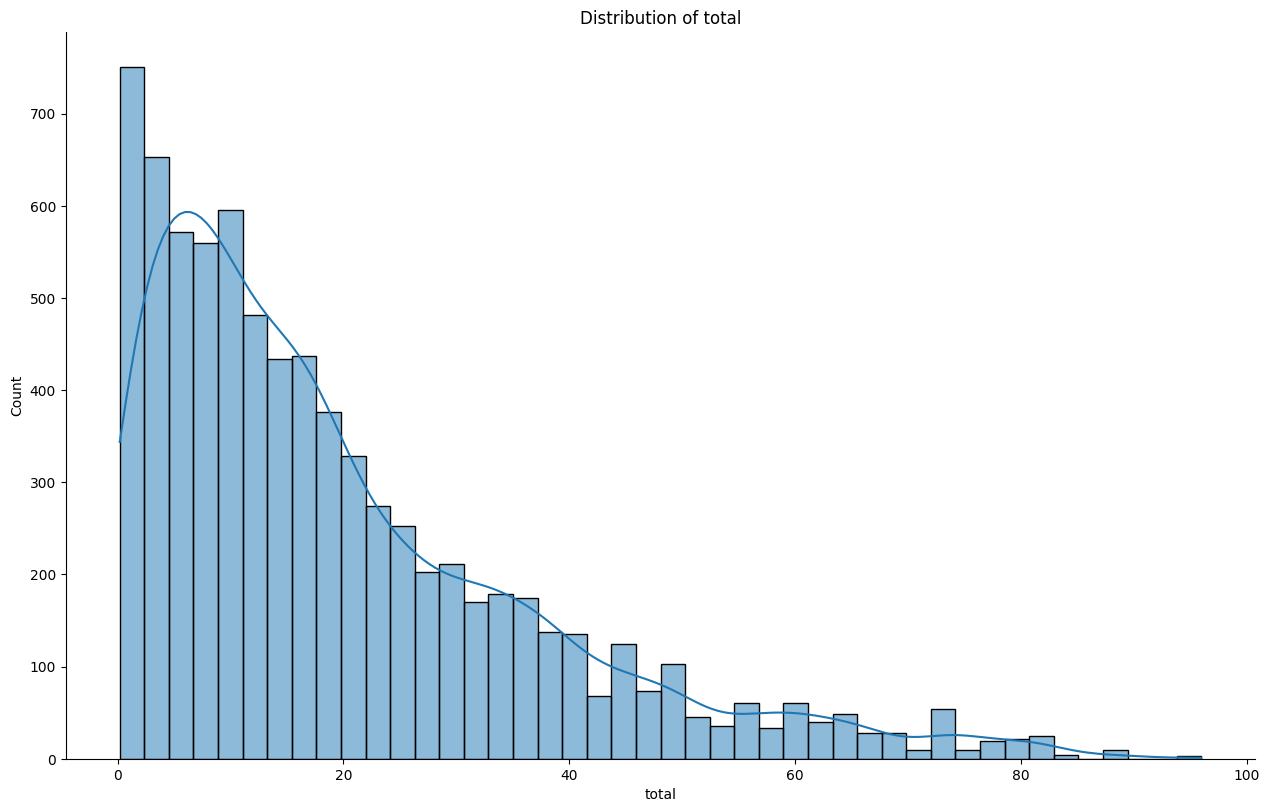

In [ ]:
plot_continuous_distribution(df, 'total')

The `total` follows a similar distribution to `unit_price`. This you may expect, as the total is calculated as `unit_price x quantity`.

However, this distribution is even more positively skewed. Once again, using intuition, this distribution makes sense. You'd expect customers at a grocery store to generally make more transactions of low value and only occasionally make a transaction of a very high value.



-----

Now let's turn our attention to the categorical columns within the dataset.

Before visualising these columns, it is worth us understanding how many unique values these columns have. If a categorical column has 1000's of unique values, it will be very difficult to visualise.


In [ ]:
get_unique_values(df, 'transaction_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64


As explained previously, `transaction_id` is a unique ID column for each transaction. Since each row represents a unique transaction, this means that we have 7829 unique transaction IDs. Therefore, this column is not useful to visualise.

In [ ]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


Similarly, `product_id` is an ID column, however it is unique based on the product that was sold within the transaction. From this computation, we can see that we have 300 unique product IDs, hence 300 unique products within the dataset. This is not worth visualising, but it certainly interesting to know. From the output of the helper function, we can see that the product most frequently was sold within this dataset was `ecac012c-1dec-41d4-9ebd-56fb7166f6d9`, sold 114 times during the week. Whereas the product least sold was `ec0bb9b5-45e3-4de8-963d-e92aa91a201e` sold just 3 times


In [ ]:
# Calculate the average sale price for each category
average_sale_prices = df.groupby('category')['total'].mean()

# Sort the average sale prices from low to high
sorted_average_sale_prices = average_sale_prices.sort_values()

# Display the sorted average sale prices
print(sorted_average_sale_prices)

category
snacks                    5.913232
vegetables                5.993452
fruit                     6.136483
spices and herbs          7.571680
packaged foods           12.571400
baking                   13.075076
canned foods             15.646125
condiments and sauces    17.191160
refrigerated items       17.497529
baked goods              18.844718
dairy                    20.137600
personal care            23.228531
cheese                   23.417304
frozen                   25.057414
pets                     26.123913
baby products            29.932902
cleaning products        32.478596
beverages                32.992159
meat                     36.917042
kitchen                  37.844634
seafood                  42.509130
medicine                 42.772757
Name: total, dtype: float64


In [ ]:
get_unique_values(df, 'category')

# Function to get unique category values
def get_unique_values(df, column):
    return df[column].unique()

# Get unique category values
unique_categories = get_unique_values(df, 'category')

# Calculate total sales amount for each category
category_sales = {}
for category in unique_categories:
    category_sales[category] = df[df['category'] == category]['total'].sum()

# Sort categories by sales amount in descending order
sorted_categories_sales = sorted(category_sales.items(), key=lambda x: x[1], reverse=True)

# Calculate total sales amount for all categories
total_sales = df['total'].sum()

# Calculate and display the top 5 categories by total sales and their percentages
#top_5_categories_sales = dict(sorted_categories_sales[:5])
categories_sales = dict(sorted_categories_sales)
for category, sales in categories_sales.items():
    percentage = (sales / total_sales) * 100
    print(f"{category}:{percentage:.2f}% ({sales})")

print(f"----------")

# Count the occurrences of each category
category_counts = {}
for category in unique_categories:
    category_counts[category] = df[df['category'] == category].shape[0]

# Sort categories by count in descending order
sorted_categories_counts = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Calculate and display the categories by count and their percentages
for category, count in sorted_categories_counts:
    percentage = (count / len(df)) * 100
    print(f"{category}: {percentage:.2f}% ({count})")


kitchen:9.37% (14456.650000000001)
meat:9.14% (14102.31)
seafood:6.97% (10754.81)
medicine:6.74% (10393.78)
beverages:6.44% (9930.64)
cleaning products:6.15% (9483.75)
baked goods:5.41% (8348.21)
dairy:4.89% (7551.6)
refrigerated items:4.82% (7436.45)
cheese:4.45% (6861.27)
canned foods:4.37% (6743.48)
baby products:4.35% (6704.969999999999)
frozen:4.27% (6590.1)
packaged foods:4.13% (6373.700000000001)
fruit:3.97% (6124.21)
vegetables:3.29% (5070.46)
pets:2.73% (4205.95)
personal care:2.66% (4111.45)
baking:2.24% (3451.8199999999997)
condiments and sauces:2.02% (3111.6)
snacks:1.01% (1555.1799999999998)
spices and herbs:0.61% (946.46)
----------
fruit: 12.75% (998)
vegetables: 10.81% (846)
packaged foods: 6.48% (507)
baked goods: 5.66% (443)
canned foods: 5.51% (431)
refrigerated items: 5.43% (425)
meat: 4.88% (382)
kitchen: 4.88% (382)
dairy: 4.79% (375)
beverages: 3.84% (301)
cheese: 3.74% (293)
cleaning products: 3.73% (292)
baking: 3.37% (264)
frozen: 3.36% (263)
snacks: 3.36% (26

In [ ]:
# Function to get unique category values
def get_unique_values(df, column):
    return df[column].unique()

# Get unique category values
unique_categories = get_unique_values(df, 'category')

# Calculate total sales amount for each category
category_sales = {}
for category in unique_categories:
    category_sales[category] = df[df['category'] == category]['total'].sum()

# Calculate total revenue
total_revenue = df['total'].sum()

# Calculate and display merged sales numbers, percentages on total sales, and total revenue
merged_results = []
for category in unique_categories:
    sales = category_sales[category]
    percentage_on_total_sales = (sales / total_revenue) * 100
    merged_results.append((category, sales, percentage_on_total_sales))

# Sort the merged results by category count in ascending order
sorted_merged_results = sorted(merged_results, key=lambda x: df[df['category'] == x[0]].shape[0])

# Display the merged results
for category, sales, percentage in sorted_merged_results:
    print(f"{category}: {sales}, {percentage:.2f}%")

spices and herbs: 946.46, 0.61%
pets: 4205.95, 2.73%
personal care: 4111.45, 2.66%
condiments and sauces: 3111.6, 2.02%
baby products: 6704.969999999999, 4.35%
medicine: 10393.78, 6.74%
seafood: 10754.81, 6.97%
frozen: 6590.1, 4.27%
snacks: 1555.1799999999998, 1.01%
baking: 3451.8199999999997, 2.24%
cleaning products: 9483.75, 6.15%
cheese: 6861.27, 4.45%
beverages: 9930.64, 6.44%
dairy: 7551.6, 4.89%
meat: 14102.31, 9.14%
kitchen: 14456.650000000001, 9.37%
refrigerated items: 7436.45, 4.82%
canned foods: 6743.48, 4.37%
baked goods: 8348.21, 5.41%
packaged foods: 6373.700000000001, 4.13%
vegetables: 5070.46, 3.29%
fruit: 6124.21, 3.97%


There are 22 unique values for `category`, with `fruit` and `vegetables` being the 2 most frequently purchased product categories and `spices and herbs` being the least. Let's visualise this too

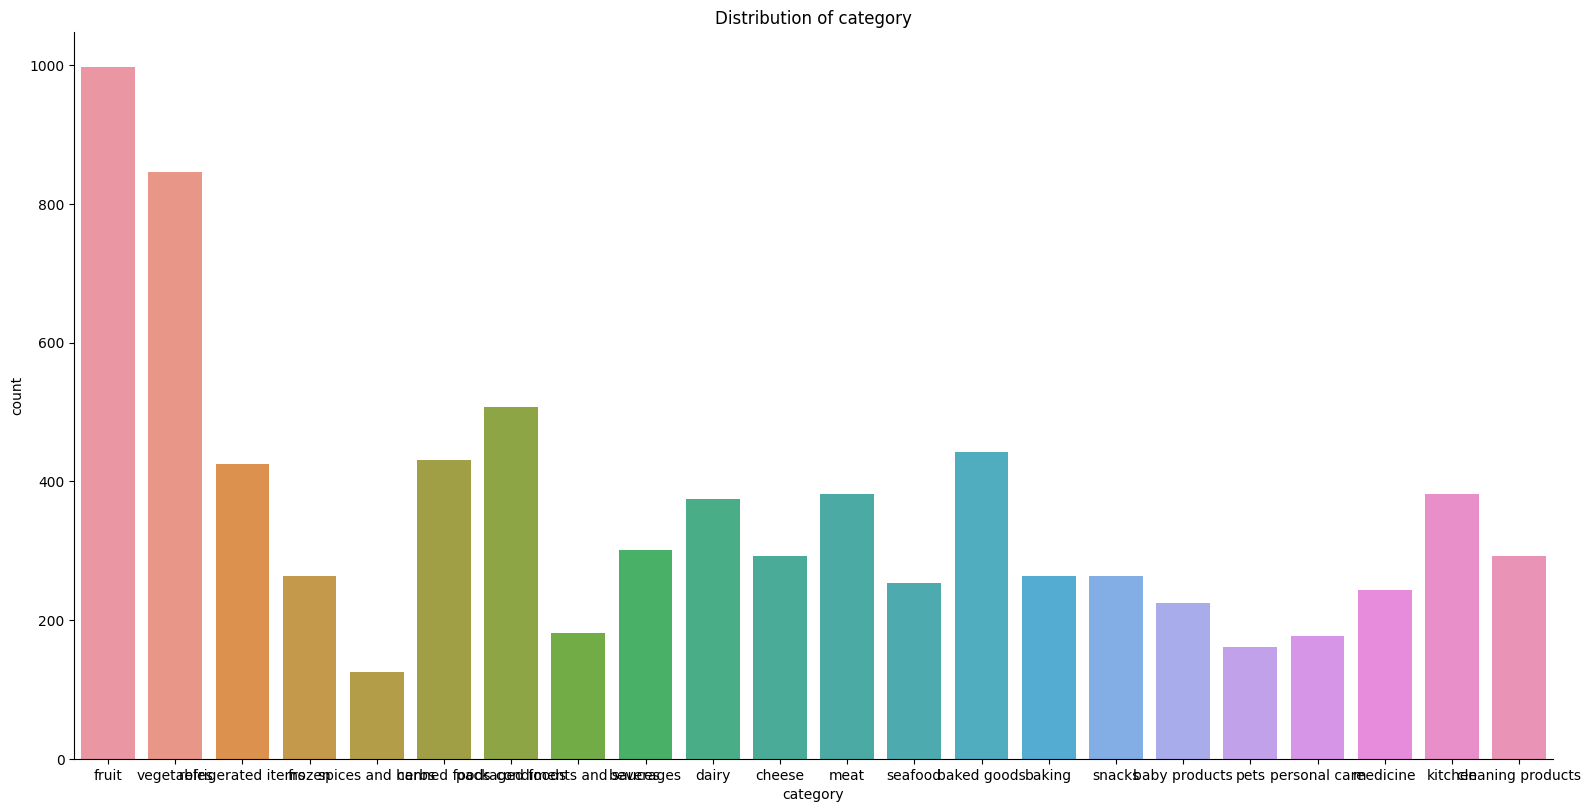

In [ ]:
plot_categorical_distribution(df, 'category')

In [ ]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


There are 5 unique values for `customer_type`, and they seem to be evenly distributed. Let's visualise this:

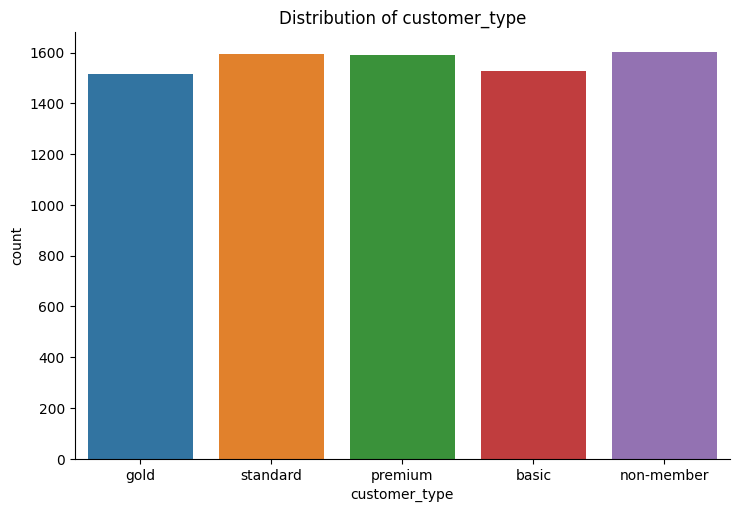

In [ ]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

From this sample of data, non-members appear to be the most frequent type of customers, closely followed by standard and premium customers

In [ ]:
get_unique_values(df, 'payment_type')

Column: payment_type has 5 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1917
debit cards       1
Name: payment_type, dtype: int64


There are 4 unique values for `payment_type`, and they seem to be quite evenly distributed once again. Let's visualise this:

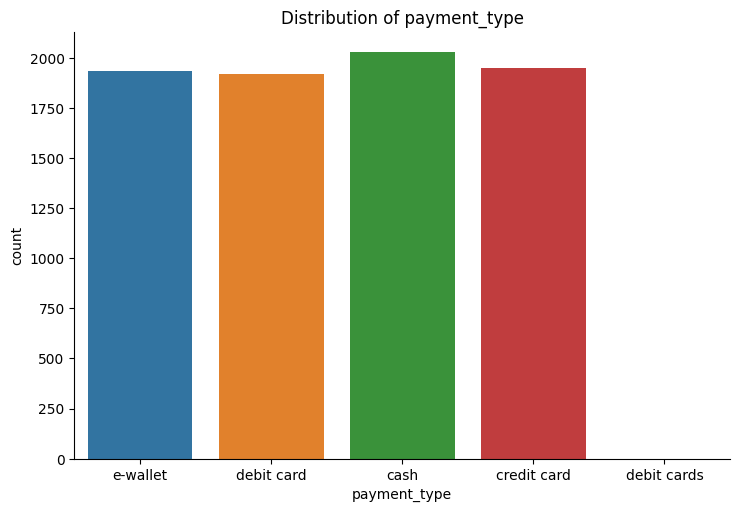

In [ ]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)

Interestingly, cash seems to be the most frequently used method of payment from this sample of data, with debit cards being the least frequent.


This dataset is a sample from 1 store across 1 week. So it will be interesting to see if the population sample follows similar patterns.

In [ ]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


Clearly there are a lot of unique values for the timestamp column.



The column named `timestamp` appears to be categorical, but in actual fact it's not. This is a datetime, following the format of `2022-03-01 10:00:45 = YYYY-MM-DD HH:MM:SS`. Therefore, we must transform this column to reflect its true form.

A helper function is provided below to convert the column into a datetime column.

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
  #create a dummy copy of all df
  dummy = data.copy()
  # edits the selected column as
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  # return the entire dataframe
  return dummy

In [ ]:
# Extracting Date Components
df['Year'] = df['DatetimeColumn'].dt.year
df['Month'] = df['DatetimeColumn'].dt.month
df['Day'] = df['DatetimeColumn'].dt.day

# Filtering Data
df[df['DatetimeColumn'] > '2023-01-01']

# Resampling and Aggregation
df.resample('D').mean()

# Calculating Time Differences
df['TimeDifference'] = df['EndDatetime'] - df['StartDatetime']

# Grouping by Time Periods
df.groupby(df['DatetimeColumn'].dt.month).mean()

# Plotting Time Series Data
df.plot(x='DatetimeColumn', y='Value', kind='line')

# Shifting and Lagging Data
df['PreviousValue'] = df['Value'].shift(1)

# Calculating Rolling Statistics
df['RollingMean'] = df['Value'].rolling(window=7).mean()

# Working with Time Zones
df['DatetimeColumn'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')


In [ ]:
df = convert_to_datetime(df, 'timestamp')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


Using the `.info()` method again, we can see that the timestamp is now of type `datetime64[ns]`, which indicates it is a datetime based data type. Now that this is a datetime column, we can explode this column out into its consitituent parts, e.g. we can explode datetime into `hour` for example.

In [ ]:
#add a new row to the table
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
 9   hour            7829 non-null   int64         
 10  day_of_week     7829 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 672.9+ KB


In [ ]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour,day_of_week
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9,2
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10,6
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17,4
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17,2
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14,5


Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


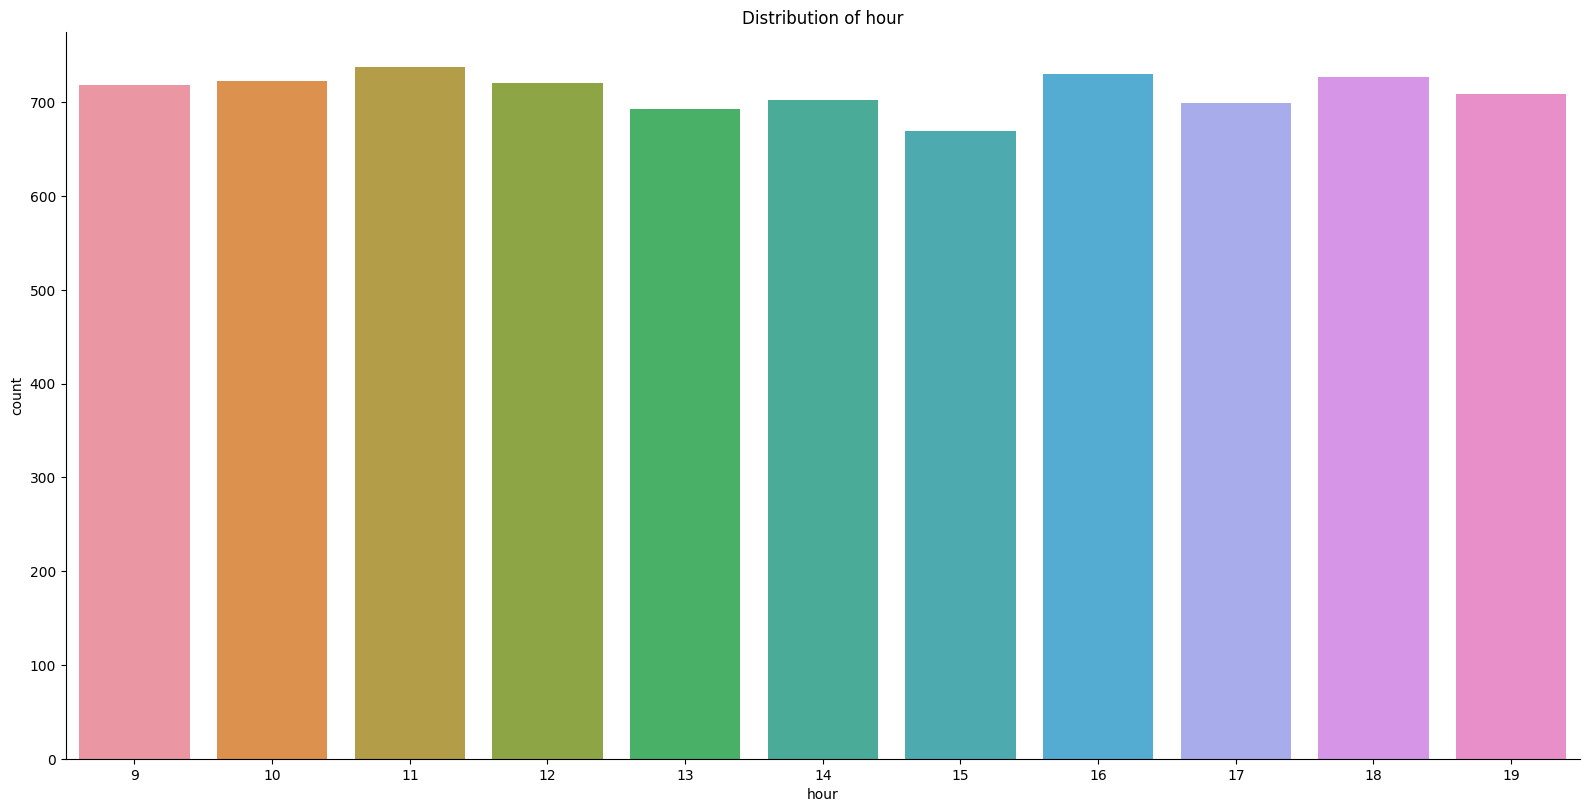

In [ ]:
get_unique_values(df, 'hour')
plot_categorical_distribution(df, 'hour')

Column: day_of_week has 7 unique values

2    1168
1    1165
6    1132
4    1108
0    1104
3    1078
5    1074
Name: day_of_week, dtype: int64


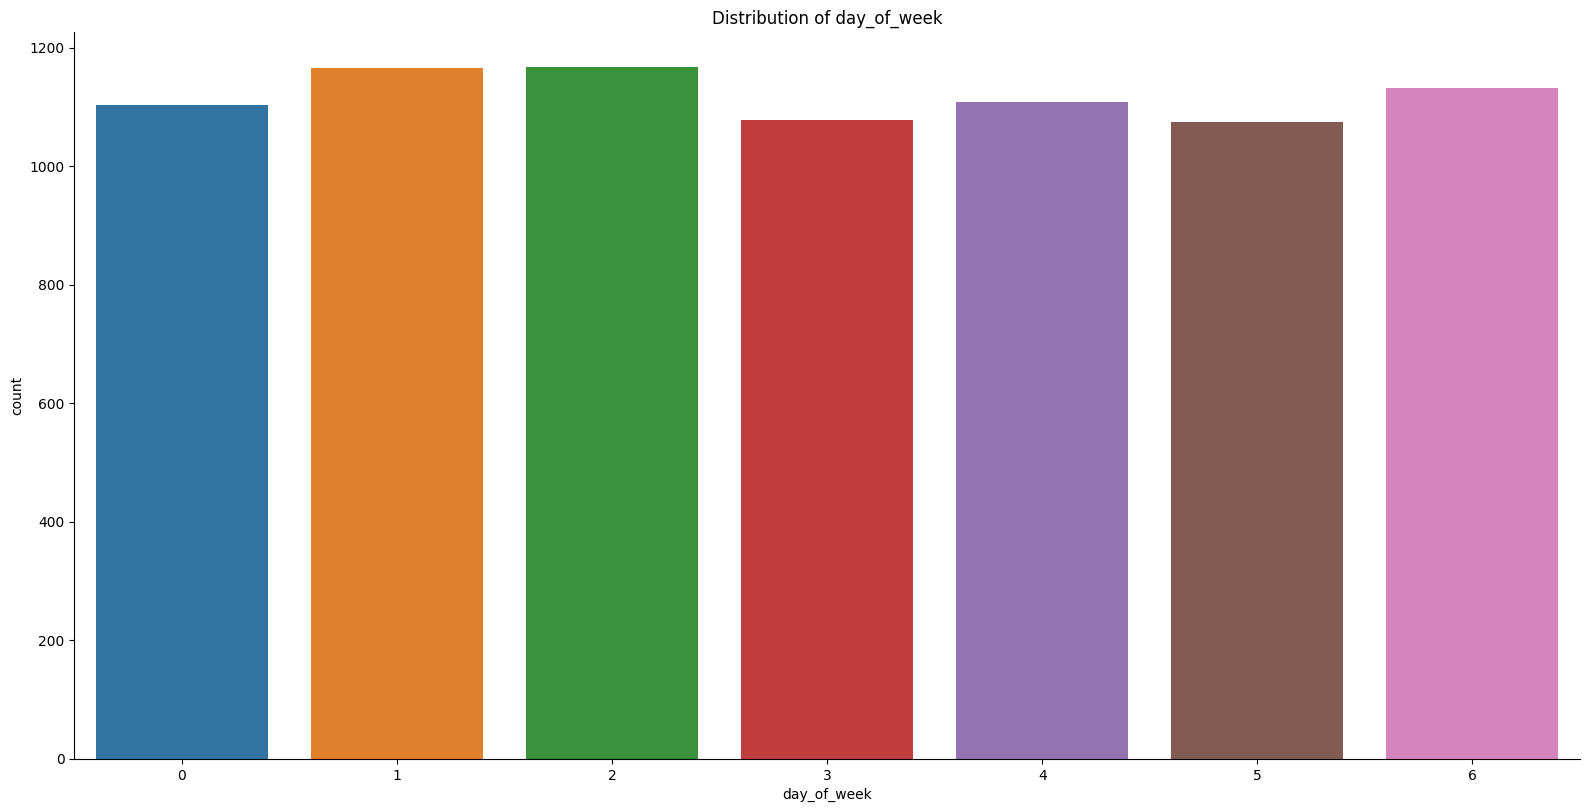

In [ ]:
get_unique_values(df, 'day_of_week')
plot_categorical_distribution(df, 'day_of_week')

From this we can see that the 11th, 16th and 18th hour of the day are the top 3 hours of the day for transactions being processed. This is interesting, this would suggest that their busiest times of day may be just before lunch, and as people are on the way home from work. Once again, this is a small sample of data, so we can't make assumptions on the population sample of data, but it gives us insights to go back to the business with.

the days when you sell more or have more activity are, in descending order: Day 2, Day 1, Day 6, Day 4, and Day 0.

---

## Section 5 - Correlations

By now, you should have a good understanding of all the columns within the dataset, as well as the values that occur within each column. One more thing that we can do is to look at how each of the numerical columns are related to each other.

To do this, we can use `correlations`. Correlations measure how each numeric column is linearly related to each other. It is measured between -1 and 1. If a correlation between 2 columns is close to -1, it shows that there is a negative correlation, that is, as 1 increases, the other decreases. If a correlation between 2 columns is close to 1, it shows that they are positively correlated, that is, as 1 increases, so does the other. Therefore, correlations do not infer that one column causes the other, but it gives us an indication as to how the columns are linearly related.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-32-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,unit_price,quantity,total,hour,day_of_week
unit_price,1.000000,0.024588,0.792018,0.010842,0.011008
quantity,0.024588,1.000000,0.521926,-0.008410,-0.006808
total,0.792018,0.521926,1.000000,0.010354,0.003110
hour,0.010842,-0.008410,0.010354,1.000000,0.022728
day_of_week,0.011008,-0.006808,0.003110,0.022728,1.000000


From this correlation matrix, we can see that the only columns that have a high correlation are `unit_price` and `total`. This is understandable because total is calculated used unit_price.

All the other correlations are close to 0, indicating that there is not a significant positive or negative correlation between the numeric variables.

---

## Section 6 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for



In [ ]:
# Function to add columns for each unique category and check if bought
def add_category_columns(df, category_column):
    unique_categories = df[category_column].unique()

    for category in unique_categories:
        # Add a column with the category name and check if it's bought
        df[category] = df[category_column] == category

    return df

# Call the function to add columns and check if bought
df = add_category_columns(df, 'category')

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-34-e76d3d5ac2b1>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,unit_price,quantity,total,hour,day_of_week,fruit,vegetables,refrigerated items,frozen,spices and herbs,canned foods,packaged foods,condiments and sauces,beverages,dairy,cheese,meat,seafood,baked goods,baking,snacks,baby products,pets,personal care,medicine,kitchen,cleaning products
unit_price,1.000000,0.024588,0.792018,0.010842,0.011008,-0.377128,-0.352162,-0.039899,0.077926,-0.112043,-0.069445,-0.141382,-0.026635,0.178335,0.006688,0.030460,0.302375,0.279623,-0.009077,-0.085892,-0.188281,0.142263,0.074211,0.038927,0.309915,0.306095,0.182051
quantity,0.024588,1.000000,0.521926,-0.008410,-0.006808,-0.019648,0.002803,0.000915,0.001313,-0.007897,0.001901,0.005405,-0.002111,0.013622,0.006341,0.029992,-0.008772,0.023224,-0.009458,-0.007829,-0.003738,-0.011846,-0.006219,0.009351,-0.003863,-0.000322,-0.003282
total,0.792018,0.521926,1.000000,0.010354,0.003110,-0.297391,-0.273666,-0.030383,0.057149,-0.088627,-0.056225,-0.107674,-0.022211,0.152240,0.005499,0.041903,0.223390,0.238823,-0.012146,-0.071046,-0.147446,0.100570,0.053274,0.030675,0.236605,0.235433,0.144063
hour,0.010842,-0.008410,0.010354,1.000000,0.022728,-0.014787,0.003294,0.008919,0.004934,0.008158,-0.022505,-0.002150,0.022885,0.010635,0.017379,0.000146,0.006798,-0.010254,-0.012254,0.022308,-0.017163,0.005633,-0.011299,0.017163,-0.000297,0.010718,-0.028935
day_of_week,0.011008,-0.006808,0.003110,0.022728,1.000000,0.015338,0.007005,-0.016458,-0.003433,-0.010427,0.005792,-0.021466,0.012594,0.019279,-0.003417,-0.017516,0.012357,-0.006098,0.003575,-0.001652,-0.020791,-0.009372,0.026647,-0.012636,0.005853,0.005247,-0.000373
fruit,-0.377128,-0.019648,-0.297391,-0.014787,0.015338,1.000000,-0.133042,-0.091577,-0.071264,-0.048688,-0.092258,-0.100580,-0.058802,-0.076430,-0.085732,-0.075368,-0.086569,-0.069850,-0.093610,-0.071404,-0.071264,-0.065599,-0.055385,-0.058133,-0.068410,-0.086569,-0.075234
vegetables,-0.352162,0.002803,-0.273666,0.003294,0.007005,-0.133042,1.000000,-0.083392,-0.064895,-0.044336,-0.084013,-0.091591,-0.053546,-0.069600,-0.078070,-0.068632,-0.078832,-0.063607,-0.085244,-0.065022,-0.064895,-0.059736,-0.050435,-0.052937,-0.062296,-0.078832,-0.068510
refrigerated items,-0.039899,0.000915,-0.030383,0.008919,-0.016458,-0.091577,-0.083392,1.000000,-0.044669,-0.030518,-0.057829,-0.063045,-0.036858,-0.047908,-0.053738,-0.047242,-0.054263,-0.043783,-0.058676,-0.044757,-0.044669,-0.041118,-0.034716,-0.036438,-0.042880,-0.054263,-0.047158
frozen,0.077926,0.001313,0.057149,0.004934,-0.003433,-0.071264,-0.064895,-0.044669,1.000000,-0.023749,-0.045001,-0.049061,-0.028682,-0.037281,-0.041818,-0.036763,-0.042227,-0.034071,-0.045661,-0.034829,-0.034761,-0.031998,-0.027016,-0.028356,-0.033369,-0.042227,-0.036698
spices and herbs,-0.112043,-0.007897,-0.088627,0.008158,-0.010427,-0.048688,-0.044336,-0.030518,-0.023749,1.000000,-0.030745,-0.033519,-0.019596,-0.025471,-0.028570,-0.025117,-0.028849,-0.023278,-0.031196,-0.023795,-0.023749,-0.021861,-0.018457,-0.019373,-0.022798,-0.028849,-0.025072
